<a href="https://colab.research.google.com/github/roshank1605A04/Social-Networks-Ads/blob/master/Social_Networks_Ads_better_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Importing the dataset
dataset = pd.read_csv('drive/My Drive/Super/Model Selection/Social_Network_Ads.csv')

# checking the shape of the data
dataset.shape

(400, 5)

In [17]:
# checking the head of the data

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [19]:
# checking the tail of the data

dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0
399,15594041,Female,49.0,36000.0,1


In [20]:
# describing the dataset

dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
# getting the info of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


In [24]:
# checking the datatypes of the data

dataset.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [27]:
# checking if the dataset contains any NULL values

dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [36]:
# checking the columns inside the dataset

dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [44]:
# let's check the values present in the purchased 

dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

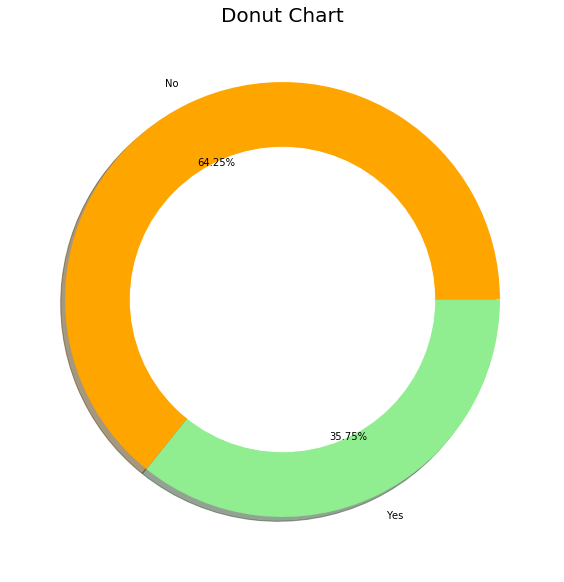

In [47]:
size = [257, 143]
colors = ['orange', 'lightgreen']
explode = [0, 0.001]
labels = 'No','Yes'

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, pctdistance = 0.7, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Chart', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

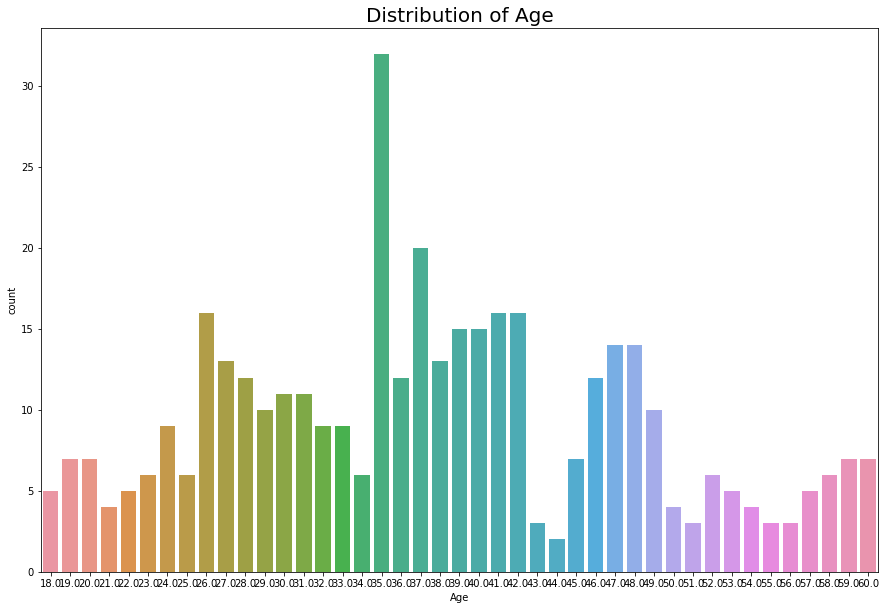

In [50]:
# checking the age of people

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)

Text(0.5, 1.0, 'Distrinution of Salary amongst the Customers')

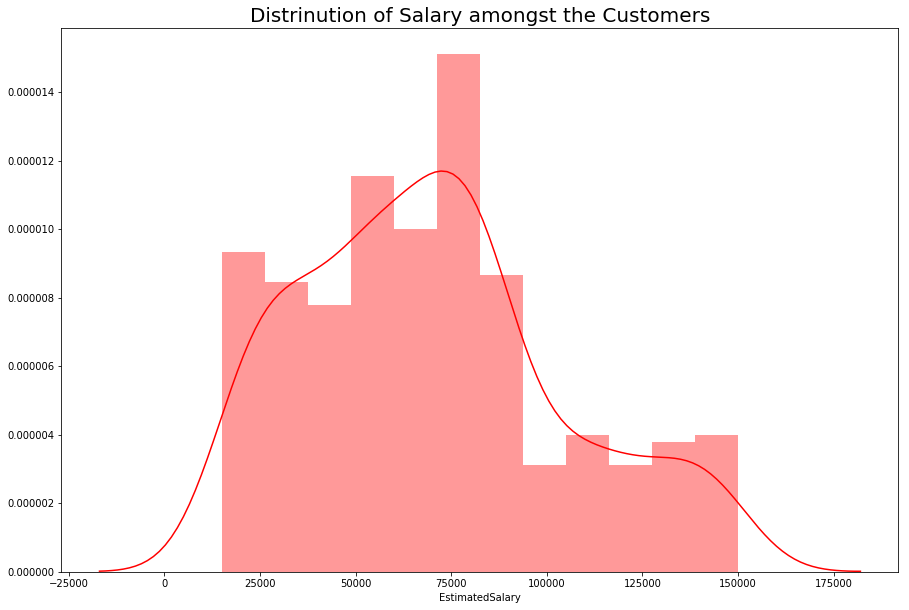

In [55]:
# distribution of salary amongst the customers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(dataset['EstimatedSalary'], color = 'red')
plt.title('Distrinution of Salary amongst the Customers', fontsize = 20)

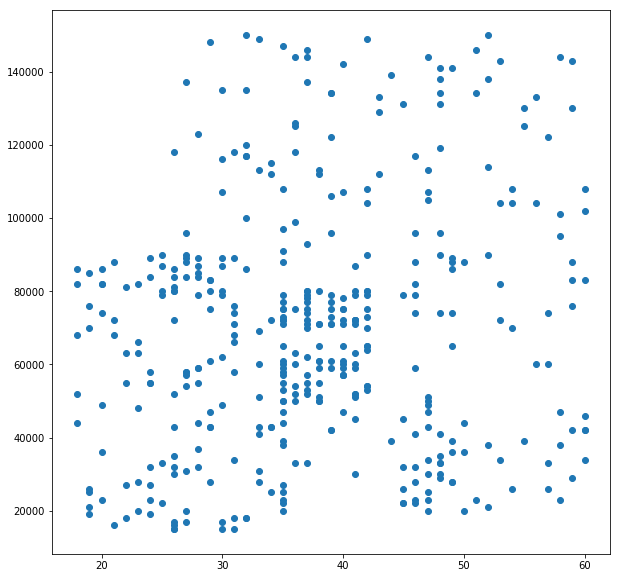

In [38]:
# plotting a scatter plot for age and purchased

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(dataset['Age'], dataset['EstimatedSalary'])
plt.show()

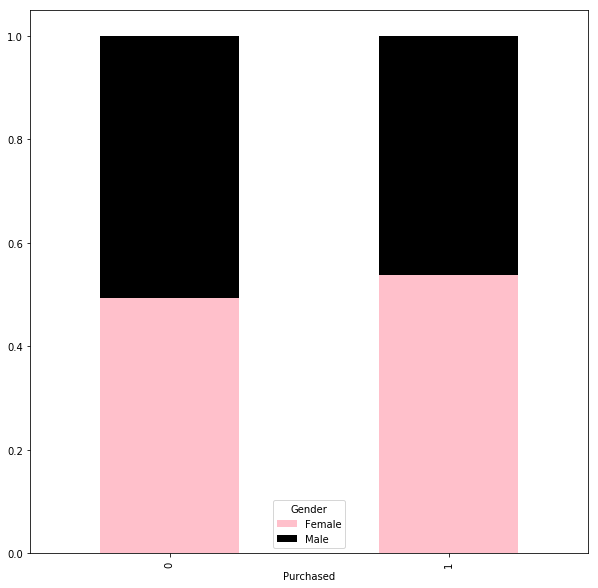

In [42]:
# column chart for looking at the relation of gender in purchased 

data = pd.crosstab(dataset['Purchased'], dataset['Gender'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 10), color = ['pink', 'black'])

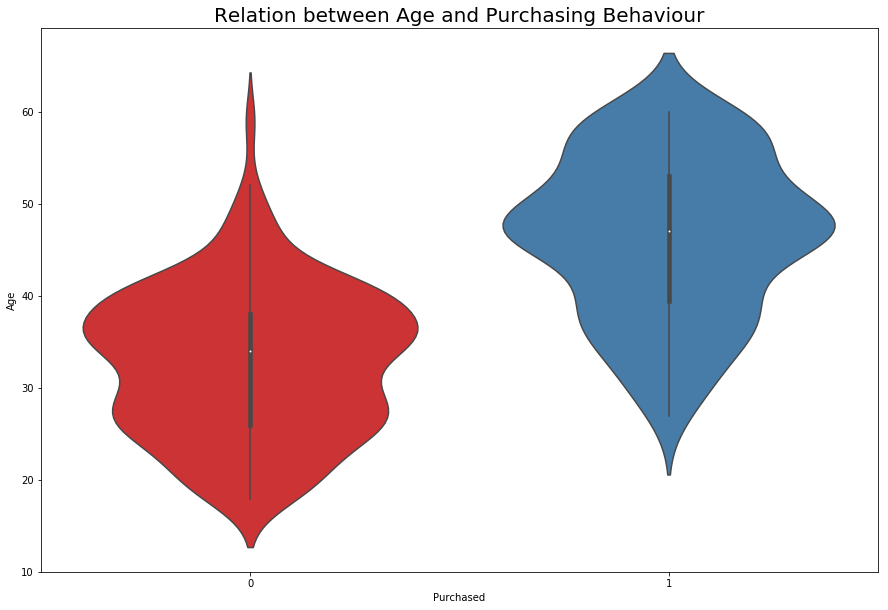

In [54]:
# violin plot

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(dataset['Purchased'], dataset['Age'], palette = 'Set1')
plt.title('Relation between Age and Purchasing Behaviour', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Estimated Salary vs Predicted Purchase by a Customer')

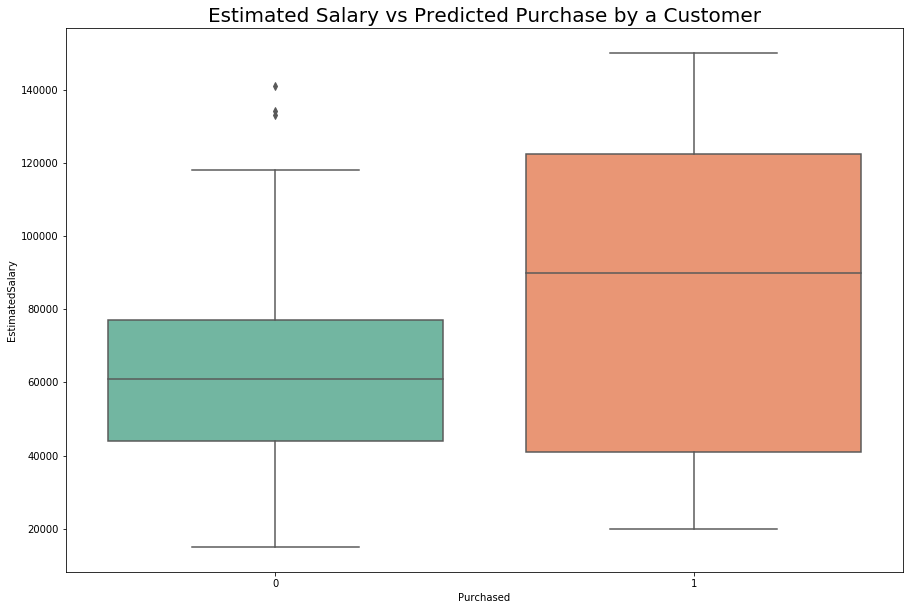

In [53]:
# box plot 

# estimated salary vs predicted

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(dataset['Purchased'], dataset['EstimatedSalary'], palette = 'Set2')
plt.title('Estimated Salary vs Predicted Purchase by a Customer', fontsize = 20)

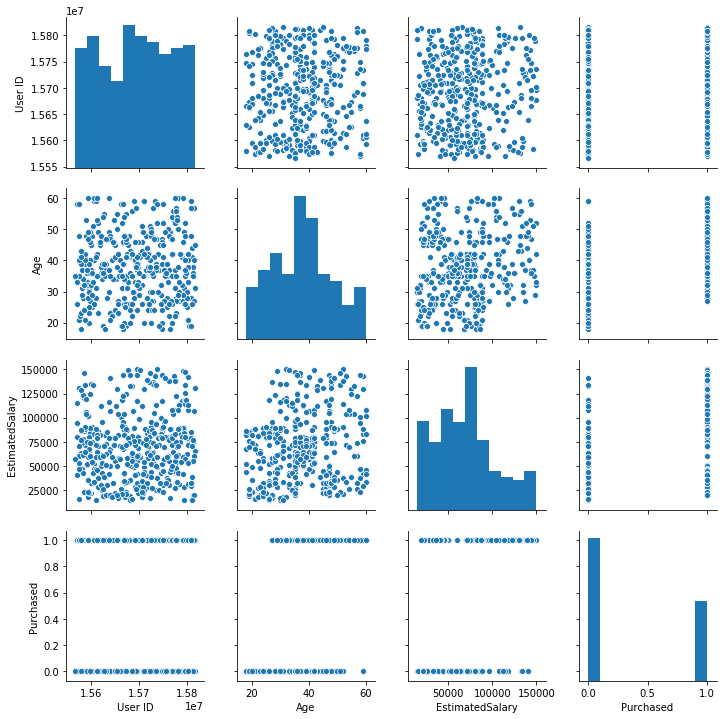

In [56]:
# plotting a pairplot for the data

sns.pairplot(dataset)

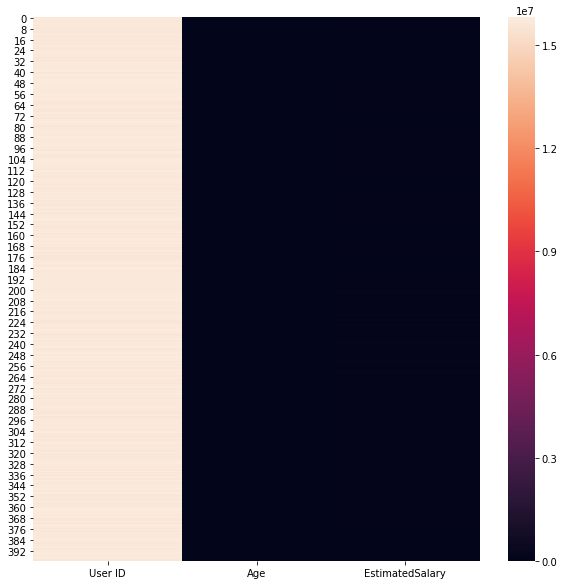

In [57]:
# plotting a heatmap  for the data

plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(dataset[['User ID', 'Age', 'EstimatedSalary']])

In [94]:
# clustering

x = dataset.iloc[:, [2, 3]].values

# checking the shape  of x
x.shape

(400, 2)

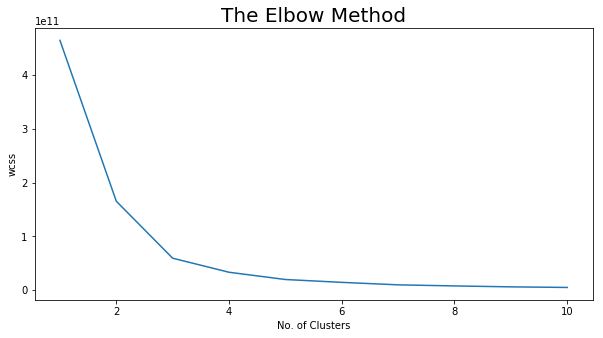

In [95]:
# checking the optimum no. of clusters for the dataset

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
# plotting the results

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

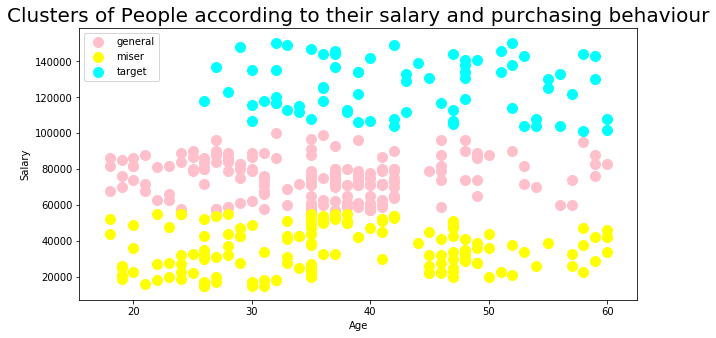

In [97]:
# making clusters

kmeans = KMeans(n_clusters = 3, max_iter = 300,  init = 'k-means++', random_state = 0, n_init = 10)
y_means = kmeans.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')

plt.title('Clusters of People according to their salary and purchasing behaviour',  fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [93]:
# splitting the dataset into dependent and independent sets

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# checking the shape of the datasets
print("Shape of X :", X.shape)
print('Shape of y :', y.shape)


Shape of X : (400, 2)
Shape of y : (400,)


In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# getting the shapes of newly created datasets
print("Shape of x_train : ", X_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (300, 2)
Shape of x_test :  (100, 2)
Shape of y_train :  (300,)
Shape of y_test :  (100,)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
# Fitting Kernel SVM to the Training set

from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

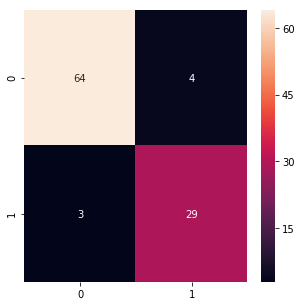

In [76]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (5 , 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [64]:
# Applying k-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# getting the results
print(accuracies.mean())
print(accuracies.std())

0.9005302187615868
0.06388957356626285


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [65]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
print(best_parameters)

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


In [67]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1 ,gamma = 0.7)
classifier.fit(X_train, y_train)



SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

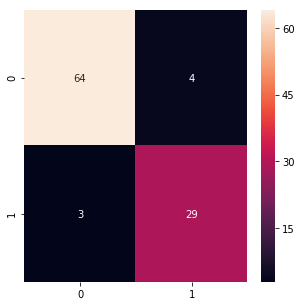

In [75]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [70]:
# making a classification report

from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

   micro avg       0.93      0.93      0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


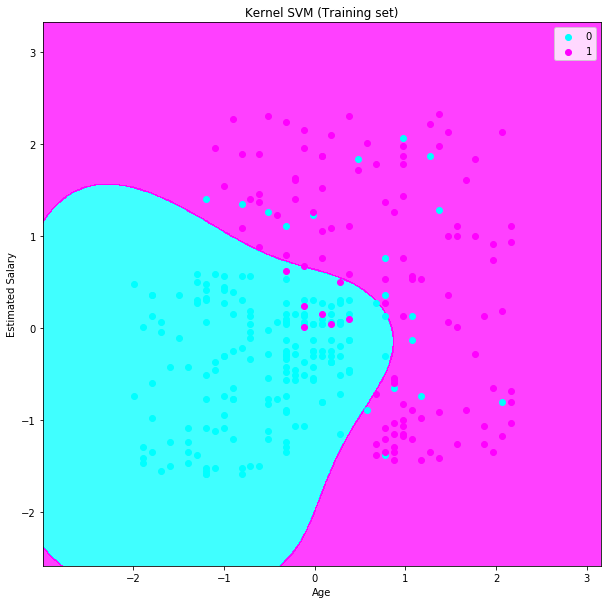

In [71]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'magenta'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


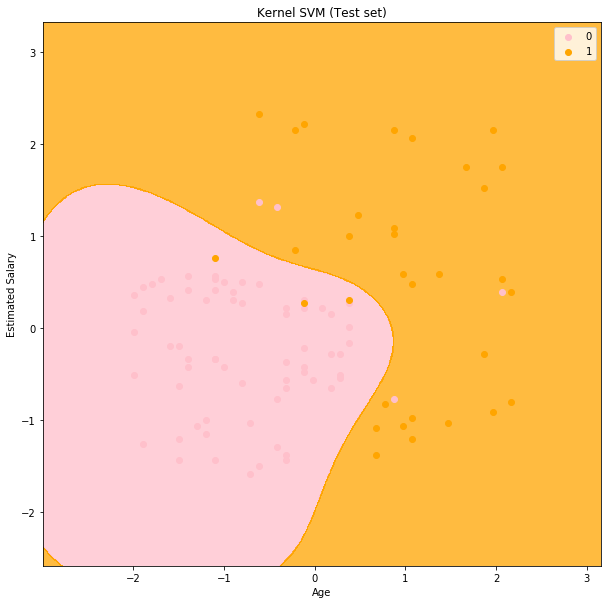

In [72]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'orange'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()